# **PREDICTIVE ANALYTICS - FORD CAR PRICE**
# Oleh : Stevi Aprilianti Cahyani

---


## **1. Data Understanding**

### **Import Library**

In [ ]:
# ====== Import Library Dasar ======
import numpy as np
import pandas as pd

# ====== Visualisasi Data ======
import matplotlib.pyplot as plt
import seaborn as sns

# ====== Import dari Google Colab ======
from google.colab import files
import zipfile

# ====== Preprocessing dan Transformasi ======
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

# ====== Model Regresi ======
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# ====== Evaluasi dan Split Data ======
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ====== Deep Learning  ======
import tensorflow as tf

### **Data Loading**

Tahap *Data Loading* adalah proses pengambilan dan pembacaan dataset dari sumber eksternal ke dalam notebook Python. Dalam proyek ini, dataset diambil langsung dari Kaggle menggunakan API resmi dari Kaggle. Proses ini memungkinkan kita mengakses dataset tanpa harus mengunggahnya secara manual.

Langkah-langkah yang dilakukan dalam tahap ini antara lain:

1. **Mengatur API Kaggle**
   
   Untuk bisa mengakses dataset, perlu mengatur autentikasi menggunakan file `kaggle.json` yang berisi API key. File ini bisa diunduh dari akun Kaggle, lalu di-*upload* ke Google Colab.


2. **Memindahkan File ke Direktori yang Sesuai**
   
   Setelah `kaggle.json` ter-upload, perlu dipindahkan ke direktori `.kaggle`.


3. **Mengunduh Dataset dari Kaggle**
   
   Menggunakan perintah `kaggle datasets download`.


4. **Ekstraksi File Dataset (Jika Dalam Bentuk Zip)**
  
   Biasanya file yang diunduh berbentuk `.zip`, sehingga perlu diekstrak.


5. **Membaca Dataset dengan Pandas**
  
   Setelah file berhasil diekstrak, file `.csv` dapat dibaca dengan `pandas`.


Tahap ini memungkinkan pengambilan dataset secara otomatis dari Kaggle, yang sangat membantu dalam menghemat waktu dan menghindari proses upload manual.

In [ ]:
# Upload kaggle.json
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"steviapriliaa","key":"dc107a3bf1955c43ea12549dc681b0eb"}'}

In [ ]:
# Membuat direktori
!mkdir -p ~/.kaggle
# Menyalin file API `kaggle.json`
!cp kaggle.json ~/.kaggle/
# Mengatur permission file `kaggle.json`
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Mengunduh dataset "ford-car-price-prediction" dari Kaggle menggunakan Kaggle API
!kaggle datasets download -d adhurimquku/ford-car-price-prediction

Dataset URL: https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction
License(s): CC0-1.0
  0% 0.00/174k [00:00<?, ?B/s]
100% 174k/174k [00:00<00:00, 596MB/s]


In [ ]:
# Membuka file ZIP dari dataset yang telah diunduh
zip_ref = zipfile.ZipFile('/content/ford-car-price-prediction.zip', 'r')
# Mengekstrak seluruh isi file ZIP ke direktori /content/
zip_ref.extractall('/content/')
# Menutup file ZIP setelah proses ekstraksi selesai
zip_ref.close()

In [ ]:
# Membaca file CSV
df_FordCar = pd.read_csv('/content/ford.csv')
# Menampilkan isi DataFrame df_FordCar
df_FordCar


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


## **2. Exploratory Data Analysis & Cleaning Data**

###**Cek Tipe Data**

In [ ]:
df_FordCar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


Dataset ini berisi **17.966 data mobil Ford** dengan total **9 kolom informasi**. Setiap baris mewakili satu mobil dengan berbagai detail yaitu

* **Model**: Jenis mobil Ford (misalnya Fiesta, Focus, dll).
* **Year**: Tahun pembuatan mobil.
* **Price**: Harga mobil dalam satuan mata uang tertentu.
* **Transmission**: Tipe transmisi mobil (Manual, Automatic, dll).
* **Mileage**: Jarak tempuh mobil dalam satuan kilometer atau mil.
* **FuelType**: Jenis bahan bakar yang digunakan (Bensin, Diesel, Hybrid, dll).
* **Tax**: Besarnya pajak tahunan kendaraan.
* **MPG (Miles per Gallon)**: Konsumsi bahan bakar, menunjukkan efisiensi penggunaan bensin.
* **Engine Size**: Kapasitas mesin mobil dalam liter.

Terdapat **6 data numerik** yakni: `year`, `price`, `mileage`, `tax`, `mpg`, dan `engineSize`
lalu **3 data kategoris** yakni: `model`, `transmission`, dan `fuelType`.




### **Cek Ringkasan Statistik**

In [ ]:
df_FordCar.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Dataset ini berisi 17.966 data mobil Ford. Rata-rata tahun mobil adalah 2016, dengan tahun tertua 1996 dan tertinggi tercatat 2060 (kemungkinan data tidak valid). Harga mobil rata-rata sekitar £12.280, dengan harga termurah £495 dan termahal £54.995. Jarak tempuh (mileage) rata-rata adalah 23.362 mil, dengan maksimal hingga 177.644 mil.

Besaran pajak (tax) bervariasi, dengan nilai rata-rata £113 dan maksimal £580. Konsumsi bahan bakar (mpg) rata-rata 57.9 mpg, menunjukkan banyak mobil hemat bahan bakar, namun ada nilai ekstrim hingga 201.8 mpg (kemungkinan error). Ukuran mesin (engineSize) rata-rata 1.35L, dengan rentang dari 0.0L hingga 5.0L, menunjukkan adanya data yang mungkin perlu dibersihkan atau diperiksa lebih lanjut.


### **Cek Missing Value**

In [ ]:
df_FordCar.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


Berdasarkan output, tidak ditemukan nilai kosong (missing values) pada dataset. Namun, perlu dilakukan pengecekan lebih lanjut terhadap keberadaan nilai 0 pada beberapa kolom numerik. Hal ini penting karena berdasarkan ringkasan statistik, terdapat nilai minimum 0.000000 yang tampak janggal, khususnya pada fitur `engineSize`. Nilai 0 pada fitur ini kemungkinan besar bukan representasi yang valid, mengingat secara logika setiap mobil pasti memiliki kapasitas mesin lebih dari nol.



In [ ]:
# Menghitung jumlah baris yang memiliki nilai 0 pada kolom 'engineSize'
engineSize = (df_FordCar.engineSize == 0).sum()
print('Jumlah nilai 0 pada kolom engineSize adalah', engineSize)

# Menampilkan semua baris yang memiliki nilai 0 pada kolom 'engineSize'
df_FordCar.loc[df_FordCar['engineSize'] == 0]

Jumlah nilai 0 pada kolom engineSize adalah 51


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13862,Kuga,2019,18990,Manual,8389,Petrol,150,35.3,0.0
14064,Focus,2016,15500,Manual,28344,Diesel,20,67.3,0.0
14082,Focus,2015,14300,Manual,40457,Diesel,20,67.3,0.0
15343,KA,2018,10000,Manual,10051,Petrol,150,43.5,0.0
15500,EcoSport,2015,8500,Manual,33403,Diesel,30,61.4,0.0
15775,Focus,2017,13000,Manual,24484,Diesel,145,70.6,0.0
16312,Focus,2015,9170,Manual,28000,Petrol,20,61.4,0.0
16313,Focus,2019,18699,Manual,10000,Petrol,145,46.3,0.0
16321,Fiesta,2017,9899,Manual,10000,Petrol,0,65.7,0.0
16322,Ka+,2018,9999,Manual,15000,Petrol,145,43.5,0.0


Setelah dilakukan pengecekan, ditemukan bahwa terdapat 51 data dengan nilai 0 pada fitur engineSize. Karena nilai 0 tidak masuk akal untuk kapasitas mesin mobil, maka langkah yang tepat selanjutnya adalah menghapus baris-baris data tersebut untuk menjaga kualitas dan validitas analisis

In [ ]:
# Menghapus semua baris yang memiliki nilai 0 pada kolom 'engineSize'
df_FordCar = df_FordCar.loc[(df_FordCar[['engineSize']] != 0).all(axis=1)]

In [ ]:
# cek ulang ringkasan statistik setelah pembersihan
df_FordCar.describe()

,year,price,mileage,tax,mpg,engineSize
count,17915.000000,17915.000000,17915.000000,17915.000000,17915.000000,17915.000000
mean,2016.865197,12280.966118,23373.346414,113.342004,57.909846,1.354653
std,2.051495,4743.706539,19476.449288,62.016558,10.127366,0.426924
min,1996.000000,495.000000,1.000000,0.000000,20.800000,1.000000
25%,2016.000000,8999.000000,9987.500000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18250.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31083.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [ ]:
# cek kembali jumlah data setelah pembersihan
df_FordCar.shape

(17915, 9)

Setelah menghapus semua baris yang memiliki nilai `engineSize` sama dengan 0, dataset `df_FordCar` kini berisi **17.915 baris** dan **9 kolom**.

Ini berarti ada **51 baris** yang dibuang dari dataset asli yang berjumlah 17.966 baris.

Langkah ini membantu memastikan bahwa data yang digunakan untuk analisis atau pemodelan hanya berisi informasi yang valid terkait ukuran mesin mobil, sehingga hasil analisis menjadi lebih akurat dan terpercaya.


### **Cek Outliers**

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'year'),
  Text(1, 0, 'price'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'tax'),
  Text(4, 0, 'mpg'),
  Text(5, 0, 'engineSize')])

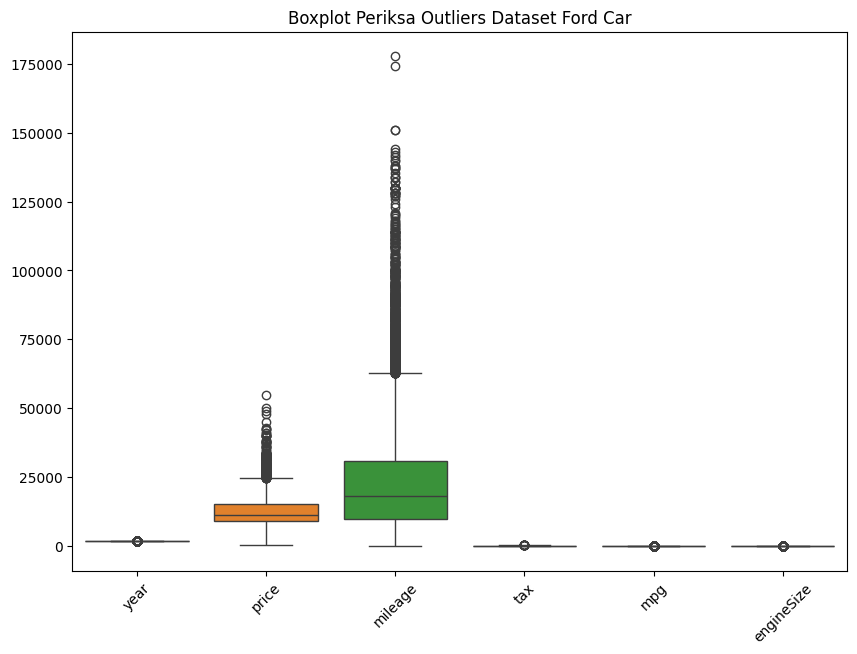

In [ ]:
plt.subplots(figsize=(10, 7))
sns.boxplot(data=df_FordCar)
plt.title("Boxplot Periksa Outliers Dataset Ford Car")
plt.xticks(rotation=45)

Boxplot menunjukkan adanya **outlier** di hampir semua fitur numerik dalam dataset mobil Ford. Outlier paling mencolok terlihat pada kolom **mileage** (jarak tempuh) dan **price** (harga mobil), di mana banyak nilai berada jauh di atas batas atas (upper whisker). Kolom **year** juga menunjukkan beberapa data tahun yang tidak wajar (misalnya tahun 2060), sedangkan **engineSize** memiliki nilai nol yang tampaknya tidak valid. Kolom **tax** dan **mpg** memiliki sedikit outlier, tapi masih dalam batas yang lebih terkendali. Secara keseluruhan, boxplot ini menunjukkan perlunya pembersihan data, terutama pada outlier yang ekstrem dan nilai yang tidak realistis.


**Menangani Outlier**

In [ ]:
# Pilih hanya kolom numerik
num_cols = df_FordCar.select_dtypes(include='number').columns

# Hitung Q1, Q3 dan IQR hanya untuk kolom numerik
Q1 = df_FordCar[num_cols].quantile(0.25)
Q3 = df_FordCar[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter data yang bukan outlier (hanya berdasarkan kolom numerik)
df_FordCar = df_FordCar[~((df_FordCar[num_cols] < (Q1 - 1.5 * IQR)) | (df_FordCar[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Data berhasil ditangani outliernya. Jumlah data setelah pembersihan: {df_FordCar.shape[0]} baris dan {df_FordCar.shape[1]} kolom.")

Data berhasil ditangani outliernya. Jumlah data setelah pembersihan: 16450 baris dan 9 kolom.


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'year'),
  Text(1, 0, 'price'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'tax'),
  Text(4, 0, 'mpg'),
  Text(5, 0, 'engineSize')])

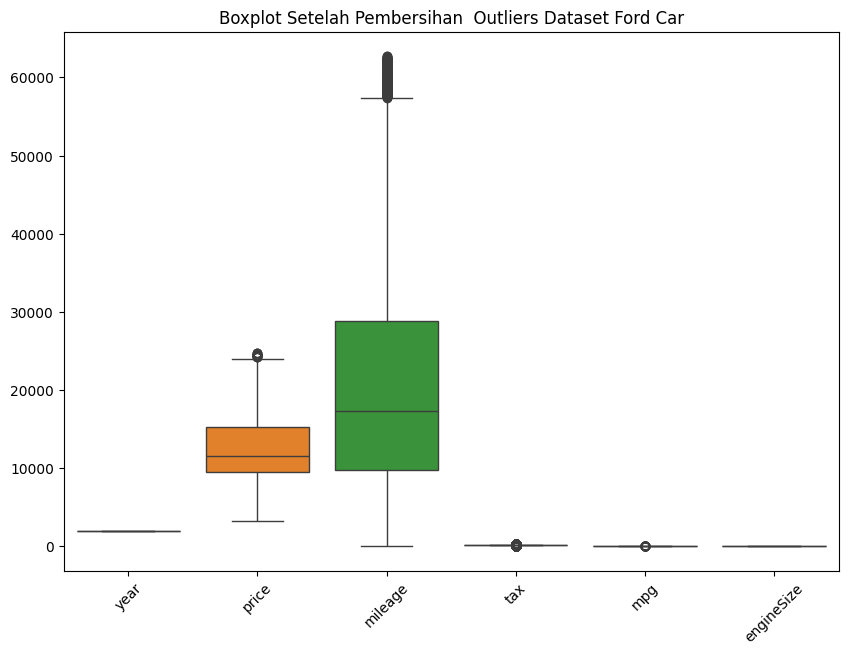

In [ ]:
plt.subplots(figsize=(10, 7))
sns.boxplot(data=df_FordCar)
plt.title("Boxplot Setelah Pembersihan  Outliers Dataset Ford Car")
plt.xticks(rotation=45)

Boxplot menunjukkan bahwa data kini jauh lebih bersih dibanding sebelumnya. Nilai-nilai ekstrem yang sebelumnya mendominasi kolom price, mileage, dan year telah berhasil dikurangi. Distribusi data menjadi lebih seimbang, dan mayoritas nilai berada dalam rentang normal.

### **Univariate Analysis**

Insialisasi/pemisahan (segregasi) variabel berdasarkan tipe data

In [ ]:
numerical = ['year','price','mileage','tax','mpg','engineSize']
categorical = ['model','transmission','fuelType']

Analisis Fitur Categorical - Model

                        jumlah sample
model                                
 Fiesta                          6198
 Focus                           4172
 Kuga                            2065
 EcoSport                        1132
 Ka+                              526
 C-MAX                            494
 Mondeo                           360
 B-MAX                            339
 S-MAX                            236
 Grand C-MAX                      234
 Galaxy                           187
 Edge                             152
 KA                               148
 Puma                              73
 Grand Tourneo Connect             56
 Tourneo Custom                    46
 Tourneo Connect                   30
 Transit Tourneo                    1
Focus                               1


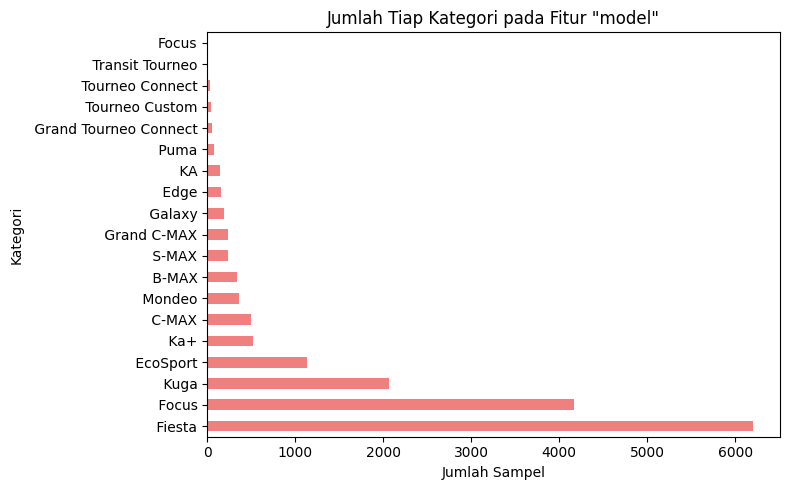

In [ ]:
# Mengambil nama fitur kategorikal pertama dari list 'categorical'
feature = categorical[0]
# Menghitung jumlah setiap kategori pada fitur tersebut
count = df_FordCar[feature].value_counts()
# Membuat DataFrame
df_model = pd.DataFrame({
    'jumlah sample': count,
})
# Menampilkan DataFrame ringkasan
print(df_model)

# Visualisasi
plt.figure(figsize=(8, 5))
count.plot(kind='barh', color='lightcoral')
plt.title(f'Jumlah Tiap Kategori pada Fitur "{feature}"')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Kategori')
plt.tight_layout()
plt.show()

Analisis fitur categorical - Transmission

              jumlah sampel
transmission               
Manual                14305
Automatic              1149
Semi-Auto               996


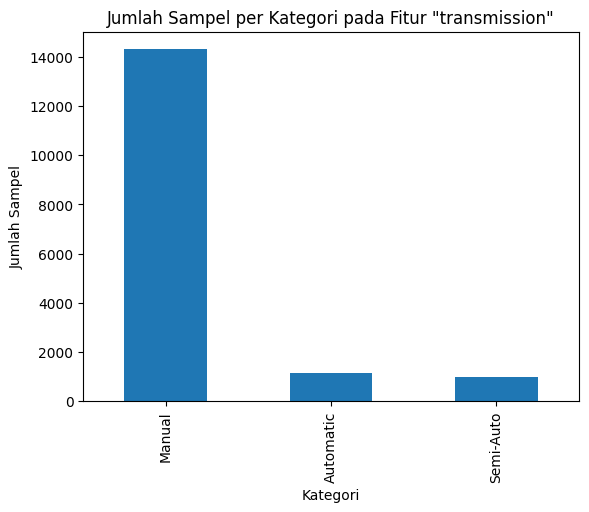

In [ ]:
# Memilih fitur kategorikal kedua dari daftar 'categorical' yaitu transmission
feature = categorical[1]
# Menghitung frekuensi setiap kategori dalam fitur tersebut
count = df_FordCar[feature].value_counts()
# Membuat DataFrame yang berisi jumlah sampel untuk tiap kategori
df_transmission = pd.DataFrame({
    'jumlah sampel': count,
})
# Menampilkan DataFrame tersebut
print(df_transmission)

# Visualisasi
count.plot(kind='bar')
plt.title(f'Jumlah Sampel per Kategori pada Fitur "{feature}"')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Sampel')
plt.show()

Analisis fitur categorical - Fuel Type

          jumlah sampel
fuelType               
Petrol            11477
Diesel             4962
Hybrid                8
Electric              2
Other                 1


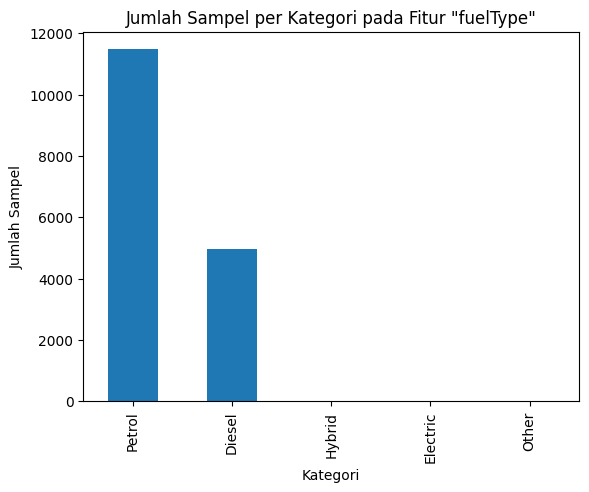

In [ ]:
# Memilih fitur kategorikal kedua dari daftar 'categorical' yaitu Fuel Type
feature = categorical[2]
# Menghitung frekuensi setiap kategori dalam fitur tersebut
count = df_FordCar[feature].value_counts()
# Membuat DataFrame yang berisi jumlah sampel untuk tiap kategori
df_fueltype = pd.DataFrame({
    'jumlah sampel': count,
})
# Menampilkan DataFrame tersebut
print(df_fueltype)

# Visualisasi
count.plot(kind='bar')
plt.title(f'Jumlah Sampel per Kategori pada Fitur "{feature}"')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Sampel')
plt.show()

Analisis Fitur Numerical - Year, Price, Mileage, Tax, Mpg dan EngineSize.

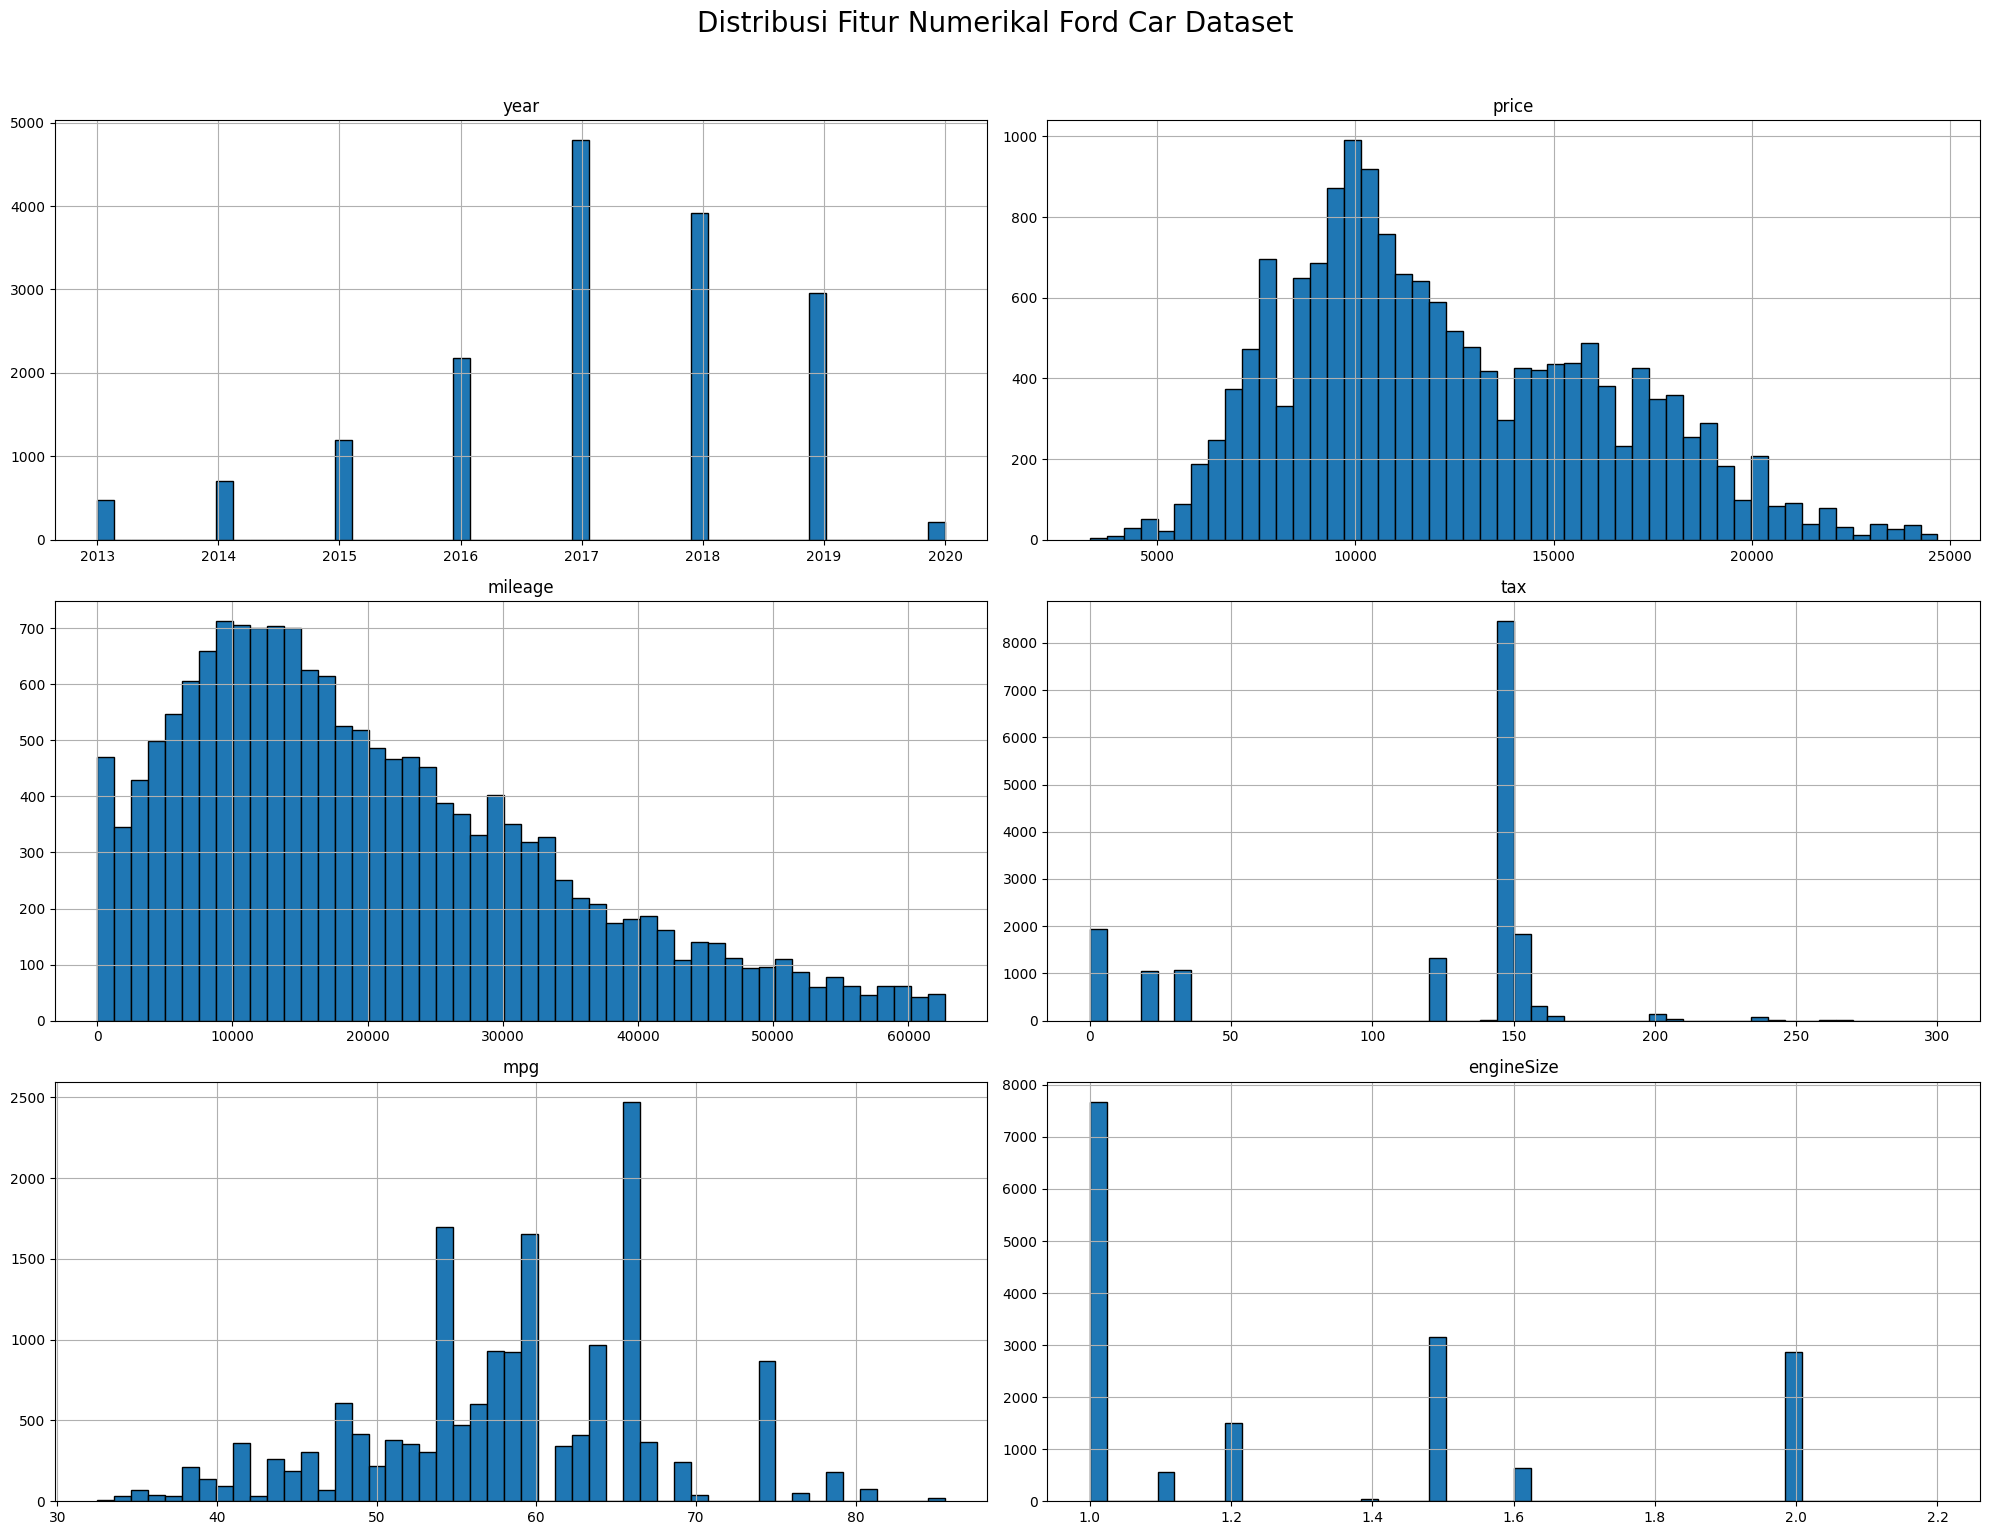

In [ ]:
# visualisasi
df_FordCar.hist(
    bins=50,
    figsize= (20 , 15),
    edgecolor='black',
    color='#1f77b4'
)

plt.suptitle('Distribusi Fitur Numerikal Ford Car Dataset', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

### **Multivariate Analysis**

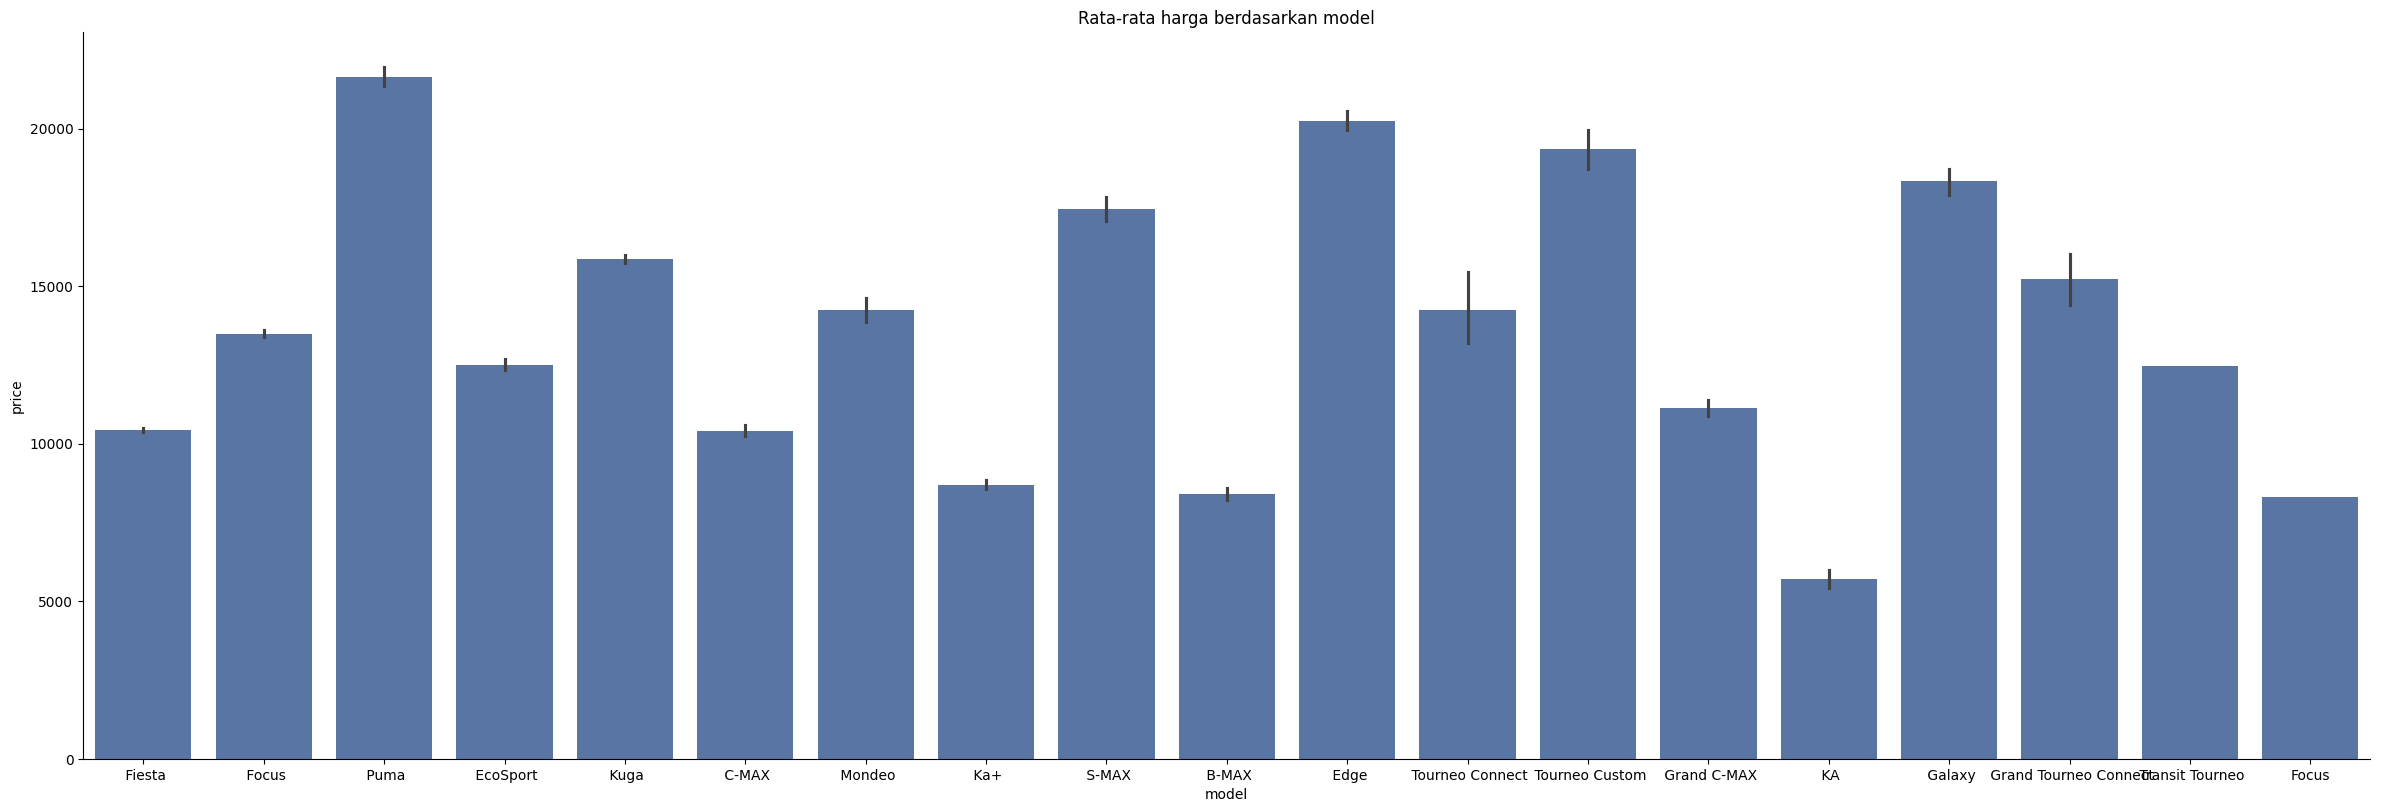

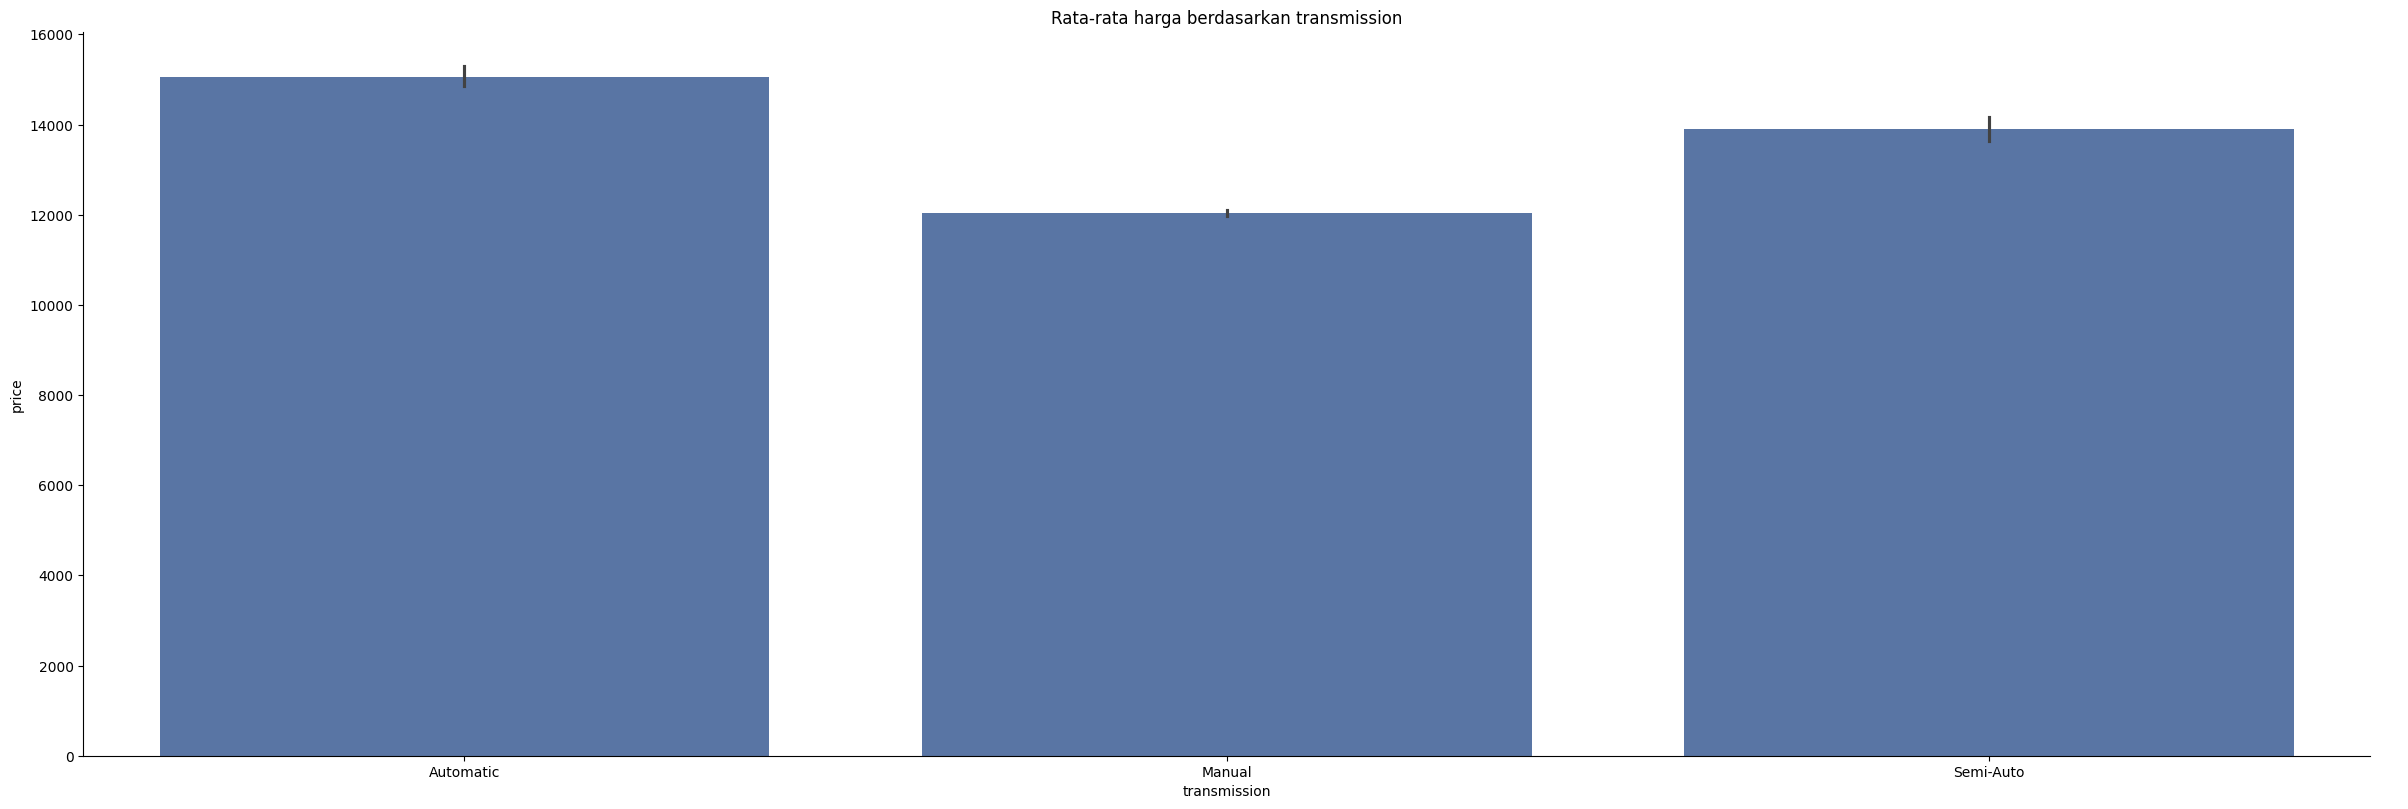

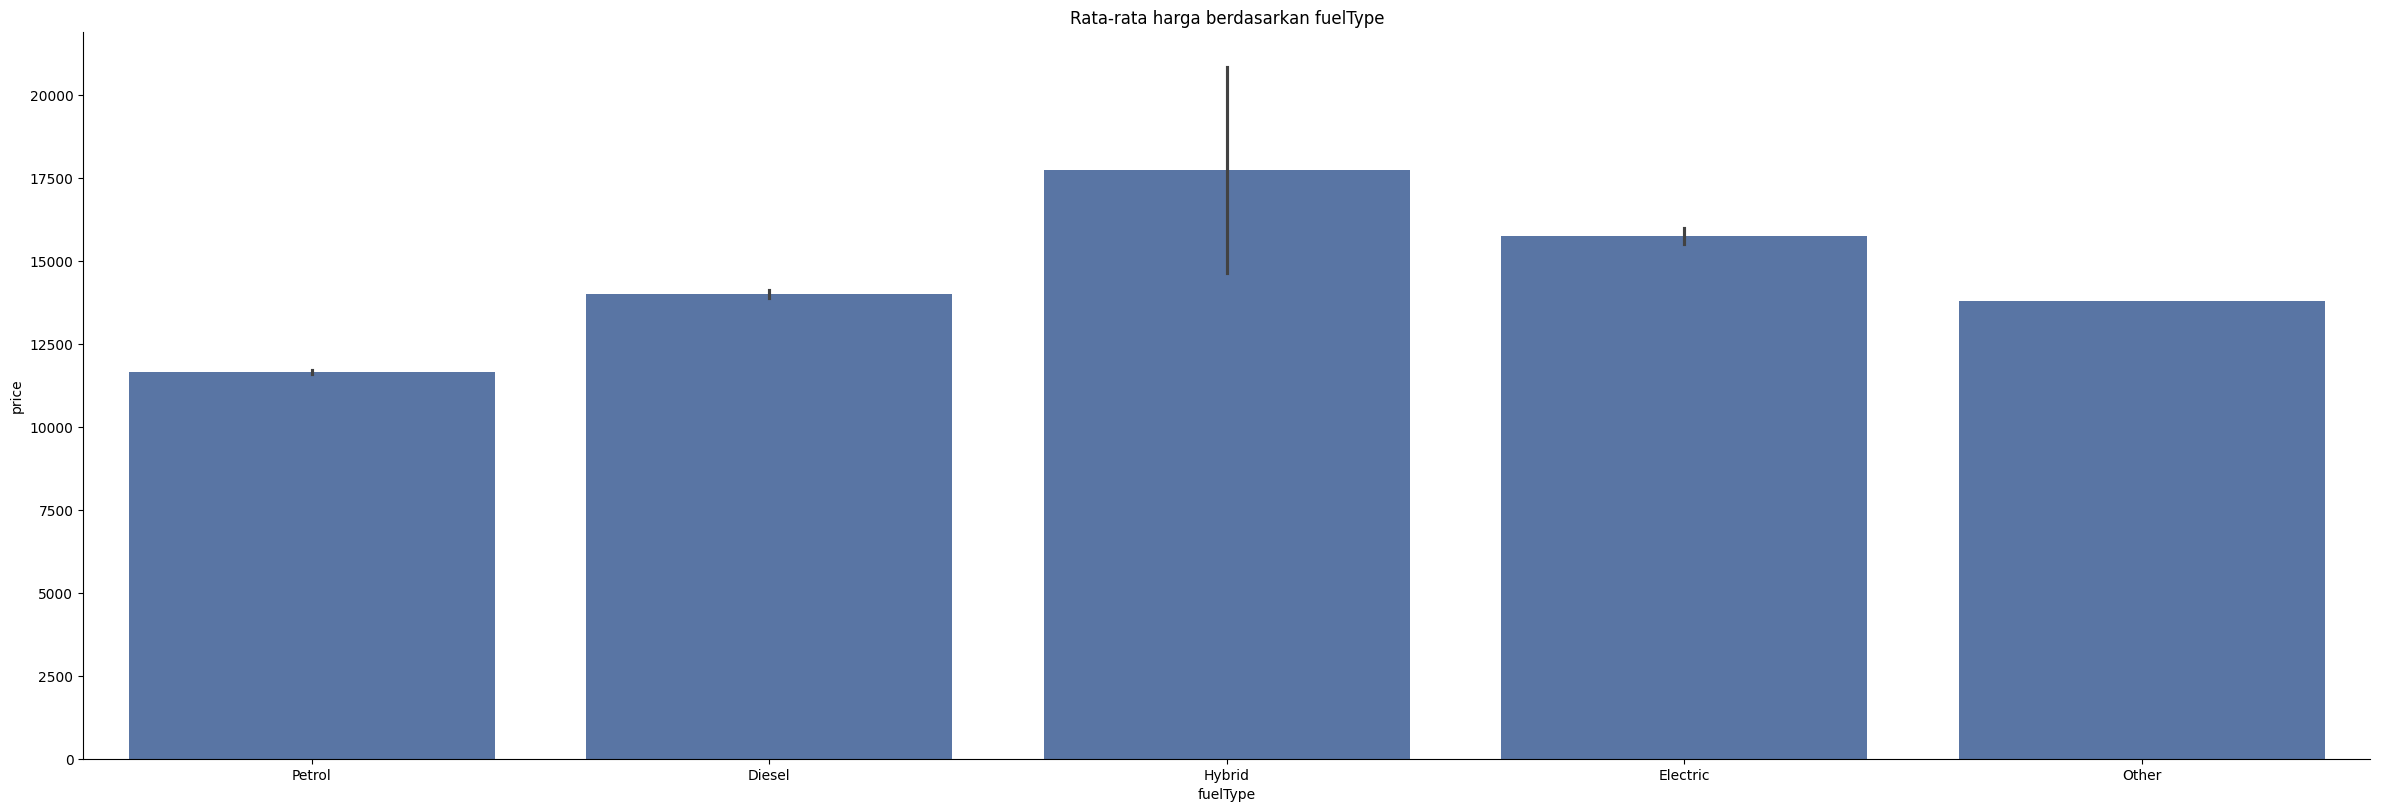

In [ ]:
categorical_features = df_FordCar.select_dtypes(include='object').columns.to_list()
# Visualisasi
for kolom in categorical_features:
    sns.catplot(
        x=kolom,
        y='price',
        kind='bar',
        dodge=False,
        height=8,
        aspect=3,
        data=df_FordCar,
        color='#4C72B0'
    )
    plt.title(f'Rata-rata harga berdasarkan {kolom}')

### **Memeriksa Korelasi antara Fitur Numerik dengan Fitur Target menggunakan Fungsi corr()**

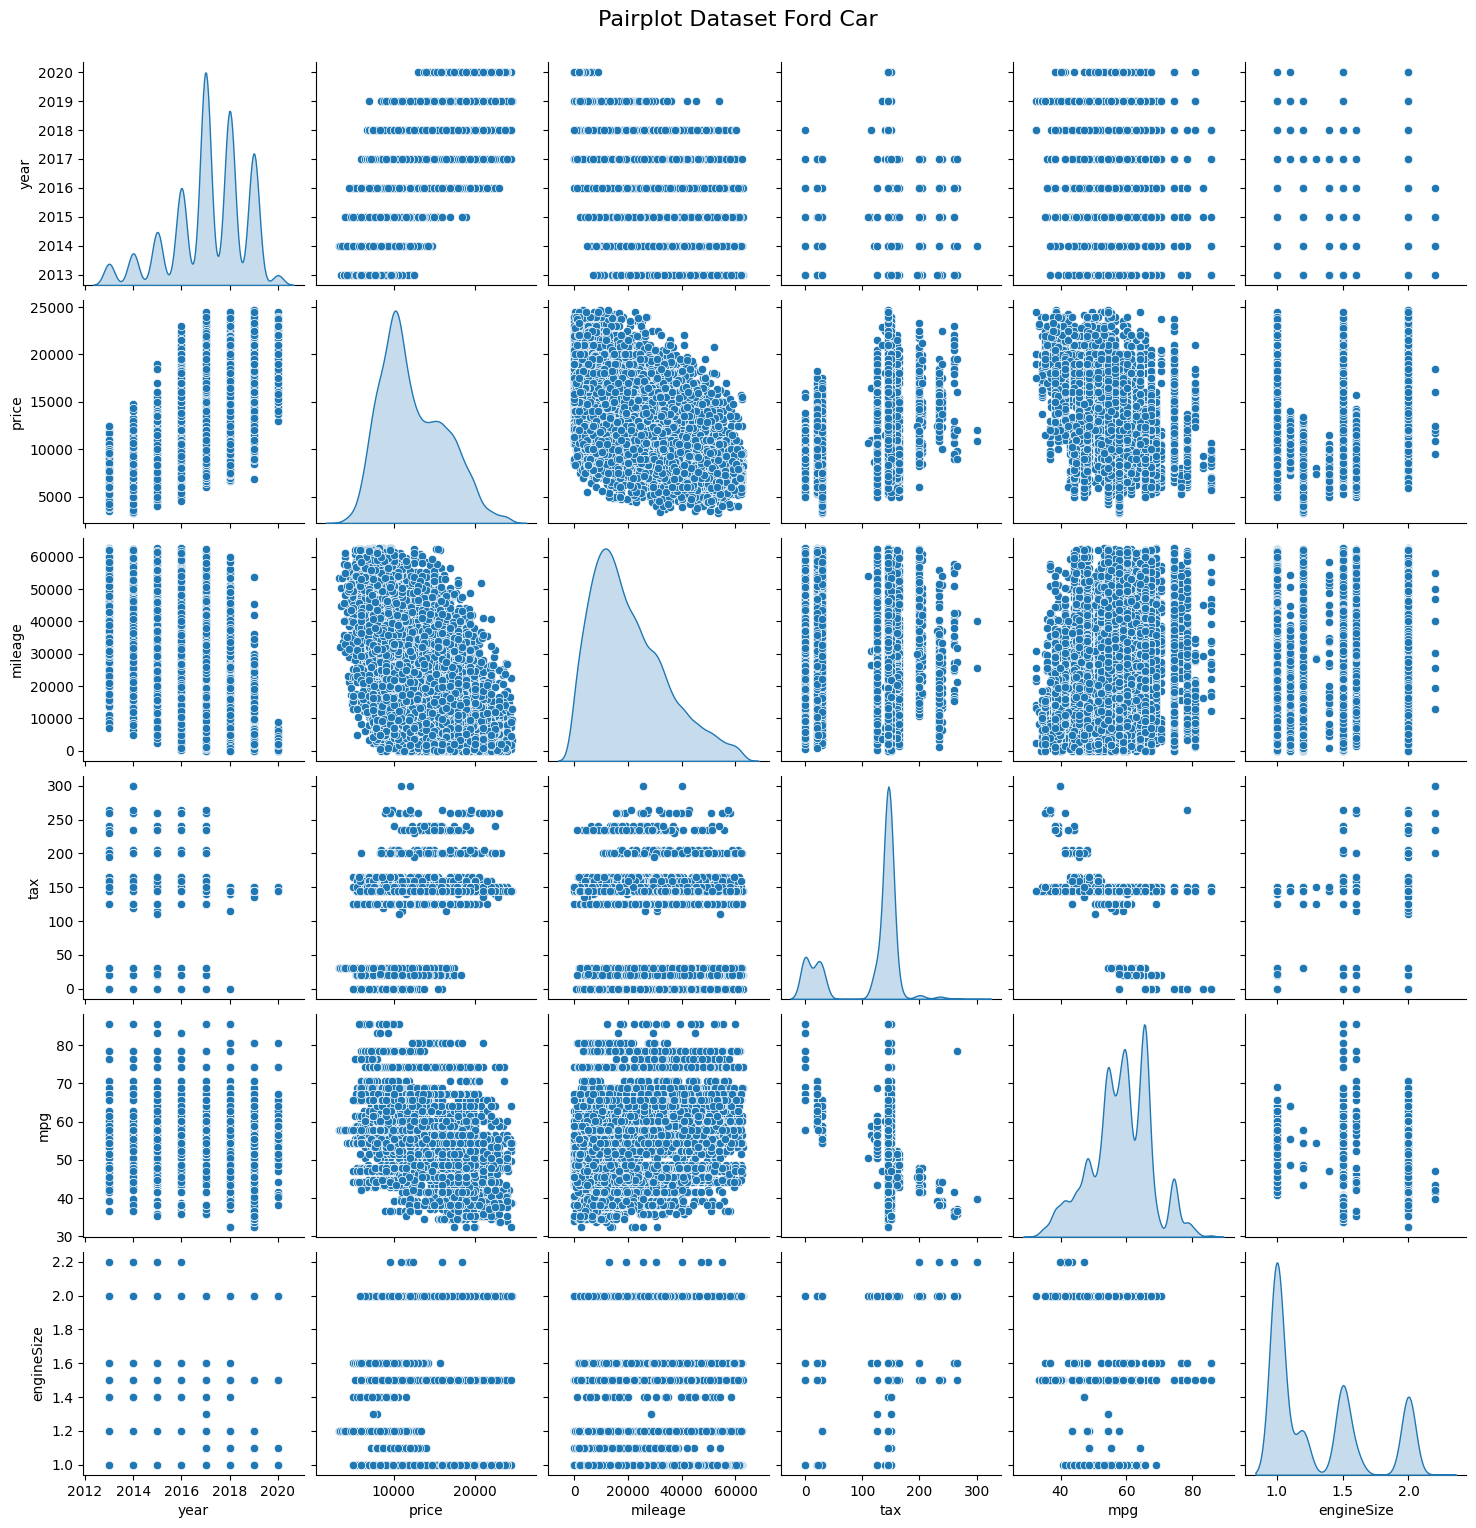

In [ ]:
# Membuat pairplot
pairplot = sns.pairplot(df_FordCar, diag_kind='kde')
pairplot.fig.suptitle("Pairplot Dataset Ford Car", y=1.02, fontsize=16)  # y=1.02 untuk sedikit di atas plot
plt.show()

Pairplot digunakan untuk mengeksplorasi hubungan antar fitur numerik dengan cara memvisualisasikan scatter plot untuk setiap pasangan fitur, serta distribusi dari masing-masing fitur di diagonal.


1. **year vs price**
   Terlihat **korelasi positif**: mobil yang lebih baru (tahun lebih tinggi) cenderung memiliki **harga lebih mahal**.

2. **mileage vs price**
   Terdapat **korelasi negatif**: semakin besar mileage (jarak tempuh), **harga mobil menurun**. Ini logis karena mobil dengan jarak tempuh tinggi biasanya lebih murah.

3. **tax dan mpg**

   * Nilai **tax** cenderung bervariasi dalam kelompok (diskrit), terlihat seperti garis horizontal.
   * **mpg (miles per gallon)** memiliki sebaran yang cukup lebar, dan tampak hubungan **negatif terhadap engineSize**, di mana mobil dengan mesin lebih besar cenderung memiliki efisiensi bahan bakar yang lebih rendah.

4. **engineSize vs price**
   Cenderung **korelasi positif**: mobil dengan mesin lebih besar biasanya lebih mahal.

5. **Distribusi** (diagonal)

   * Fitur seperti `year`, `tax`, `engineSize` bersifat **diskrit** (nilai-nilai terbatas).
   * `price` dan `mileage` memiliki distribusi **right-skewed**, banyak data di harga/jarak rendah dan sedikit di harga/jarak tinggi.

6. **Hubungan antar fitur lainnya**

   * `year` dan `mileage` menunjukkan **korelasi negatif**, mobil yang lebih baru cenderung memiliki mileage yang lebih rendah.
   * Korelasi antara `mpg` dan `engineSize` juga terlihat cukup kuat secara visual: makin besar mesin, makin boros bahan bakar.


### **Memeriksa Kolerasi Fitur Numerik Menggunakan Heatmap**

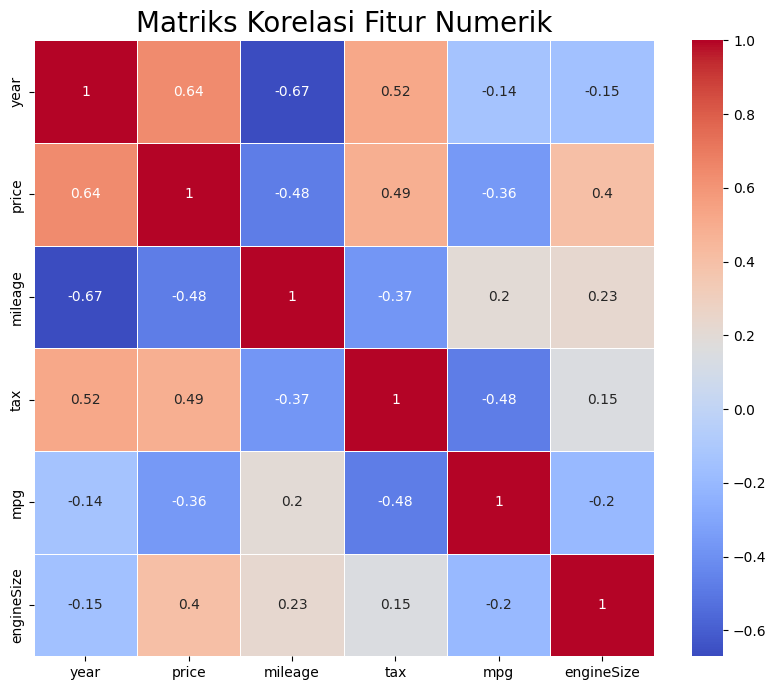

In [ ]:
plt.figure(figsize=(10,8))

# Ambil hanya kolom numerik
num_cols = df_FordCar.select_dtypes(include='number')

# Hitung korelasi
corre_matrix = num_cols.corr().round(2)

# Visualisasi heatmap
sns.heatmap(data=corre_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik', size=20)
plt.show()

Heatmap digunakan untuk menunjukkan **hubungan linear antar fitur numerik** dalam bentuk **koefisien korelasi Pearson**:


1. **Korelasi Positif Tinggi**

   * `year` dengan `price` (**0.64**): Mobil yang lebih baru cenderung lebih mahal.
   * `tax` dengan `price` (**0.49**) dan `year` (\*\*0.52\`): Pajak kendaraan cenderung lebih tinggi untuk mobil yang baru dan mahal.
   * `engineSize` dengan `price` (**0.40**): Mesin lebih besar umumnya terdapat pada mobil yang lebih mahal.

2. **Korelasi Negatif Kuat**

   * `mileage` dengan `year` (**-0.67**) dan `price` (**-0.48**): Mobil yang lebih tua cenderung memiliki jarak tempuh lebih tinggi dan harga yang lebih rendah.
   * `mpg` dengan `tax` (**-0.48**): Semakin irit mobil (mpg tinggi), biasanya semakin rendah pajaknya.

3. **Korelasi Lemah atau Hampir Tidak Ada**

   * `engineSize` memiliki korelasi rendah terhadap sebagian besar fitur lainnya kecuali `price`.
   * `mpg` punya korelasi kecil negatif terhadap `year` dan `engineSize`.



In [ ]:
# drop beberapa fitur karena korelasinya rendah
df_FordCar.drop(['mileage'], inplace=True, axis=1)
df_FordCar.drop(['mpg'], inplace=True, axis=1)
df_FordCar

,model,year,price,transmission,fuelType,tax,engineSize
0,Fiesta,2017,12000,Automatic,Petrol,150,1.0
1,Focus,2018,14000,Manual,Petrol,150,1.0
2,Focus,2017,13000,Manual,Petrol,150,1.0
3,Fiesta,2019,17500,Manual,Petrol,145,1.5
4,Fiesta,2019,16500,Automatic,Petrol,145,1.0
...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,Petrol,150,1.4
17962,B-MAX,2014,7499,Manual,Petrol,30,1.0
17963,Focus,2015,9999,Manual,Diesel,20,1.6
17964,KA,2018,8299,Manual,Petrol,145,1.2


## **3. Data Preparation**

### Encoding Fitur Category

In [ ]:
# Encoding kolom 'model'
model_dummies = pd.get_dummies(df_FordCar['model'], prefix='model', drop_first=True)

# Encoding kolom 'transmission'
transmission_dummies = pd.get_dummies(df_FordCar['transmission'], prefix='transmission', drop_first=True)

# Encoding kolom 'fuelType'
fuel_dummies = pd.get_dummies(df_FordCar['fuelType'], prefix='fuelType', drop_first=True)

# Menggabungkan hasil encoding ke DataFrame utama
df_FordCar = pd.concat([df_FordCar, model_dummies, transmission_dummies, fuel_dummies], axis=1)

# Hapus kolom aslinya karena sudah diencoding
df_FordCar.drop(['model', 'transmission', 'fuelType'], axis=1, inplace=True)

# Tampilkan hasil
print("Hasil Encoding:")
df_FordCar.head()

Hasil Encoding:


,year,price,tax,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Fiesta,model_ Focus,model_ Galaxy,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,150,1.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2018,14000,150,1.0,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,13000,150,1.0,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,17500,145,1.5,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
4,2019,16500,145,1.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


### Reduksi Dimensi PCA

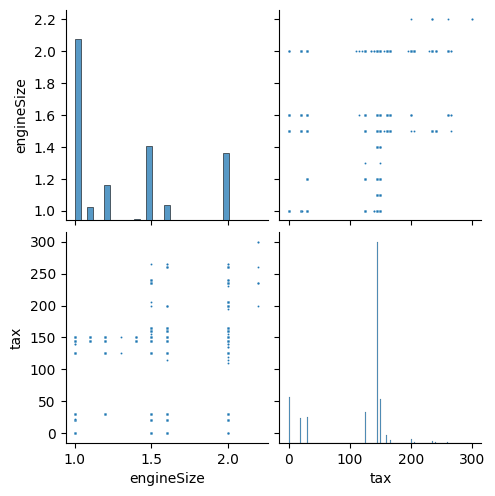

In [ ]:
sns.pairplot(df_FordCar[['engineSize','tax']], plot_kws={'s':2})

**Aplikasi Class PCA**

In [ ]:
# Inisialisasi PCA (Principal Component Analysis) untuk mereduksi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2, random_state=69)

# Melatih (fit) PCA pada dua fitur: 'engineSize' dan 'tax'
# PCA akan mencari kombinasi linier terbaik dari kedua fitur ini
pca.fit(df_FordCar[['engineSize','tax']])

# Mentransformasikan data asli menjadi dua principal components (komponen utama)
# Hasilnya adalah representasi baru dari data dalam ruang berdimensi 2
princ_comp = pca.transform(df_FordCar[['engineSize','tax']])

**Informasi Kedua Komponen**

In [ ]:
# Menampilkan rasio variansi yang dijelaskan oleh masing-masing komponen utama dari PCA
# Ini menunjukkan seberapa besar informasi (variansi) dari data asli yang berhasil ditangkap oleh masing-masing komponen
pca.explained_variance_ratio_.round(2)

array([1., 0.])

### Membuat Fitur dengan nama 'feature'

In [ ]:
# Inisialisasi PCA untuk mereduksi dua fitur ('engineSize' dan 'tax') menjadi satu komponen utama
pca = PCA(n_components=1, random_state=69)

# Melatih model PCA pada fitur 'engineSize' dan 'tax'
pca.fit(df_FordCar[['engineSize', 'tax']])

# Mentransformasikan dua fitur tersebut menjadi satu fitur baru hasil PCA, lalu flatten agar menjadi 1D array
df_FordCar['feature'] = pca.transform(df_FordCar[['engineSize', 'tax']]).flatten()

# Menghapus kolom asli 'engineSize' dan 'tax' karena sudah direpresentasikan dalam fitur baru
df_FordCar.drop(['engineSize', 'tax'], axis=1, inplace=True)

### Membagi Data Latih & Data Uji dengan Train Test Split

In [ ]:
# Memisahkan fitur (X) dan target (y)
x = df_FordCar.drop(['price'], axis=1)   # X = semua kolom kecuali 'price'
y = df_FordCar['price']                  # y = kolom 'price' sebagai target

# Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=69
)

# Menampilkan ukuran masing-masing data
print("Ukuran x_train dan y_train:", x_train.shape, y_train.shape)
print("Ukuran x_test dan y_test:", x_test.shape, y_test.shape)

Ukuran x_train dan y_train: (13160, 26) (13160,)
Ukuran x_test dan y_test: (3290, 26) (3290,)


### Standarisasi

In [ ]:
# Menentukan kolom numerik yang akan dinormalisasi
numerical = ['year', 'feature']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melatih scaler hanya pada data latih
scaler.fit(x_train[numerical])

# Transformasi kolom numerik di data latih agar terstandarisasi (mean = 0, std = 1)
x_train[numerical] = scaler.transform(x_train[numerical])

# Menampilkan 5 baris pertama dari kolom numerik yang sudah dinormalisasi
x_train[numerical].head()

,year,feature
11008,1.232115,0.622609
17263,0.577771,0.537728
8115,-0.730916,0.198237
9611,-0.076572,-1.414345
7958,1.232115,0.537728


In [ ]:
# Menampilkan ringkasan statistik dari kolom numerik yang sudah dinormalisasi
# Hasilnya dibulatkan hingga 4 angka di belakang koma
x_train[numerical].describe().round(4)

,year,feature
count,13160.0000,13160.0000
mean,-0.0000,0.0000
std,1.0000,1.0000
min,-2.6939,-1.9236
25%,-0.7309,0.1982
50%,-0.0766,0.5377
75%,0.5778,0.5377
max,1.8865,3.1688


## **4. Model Development**

### Menyiapkan Dataframe

In [ ]:
# Membuat DataFrame kosong untuk menyimpan nilai MSE (Mean Squared Error)
# dari masing-masing model pada data train dan test
models = pd.DataFrame(
    index=['train_mse', 'test_mse'],
    columns=['KNN', 'RandomForest', 'Boosting']
)

### K-Nearest Neighbor

In [ ]:
# Inisialisasi model K-Nearest Neighbors Regressor dengan 10 tetangga terdekat
KNN_model = KNeighborsRegressor(n_neighbors=10)

# Melatih model KNN dengan data pelatihan
KNN_model.fit(x_train, y_train)

# Memprediksi harga mobil pada data pelatihan menggunakan model yang sudah dilatih
y_pred_KNN_model = KNN_model.predict(x_train)

### Random Forest

In [ ]:
# Inisialisasi model Random Forest Regressor
RF_model = RandomForestRegressor(
    n_estimators=45,
    max_depth=16,
    random_state=69,
    n_jobs=-1
)

# Melatih model dengan data pelatihan
RF_model.fit(x_train, y_train)

# Menghitung Mean Squared Error (MSE) pada data pelatihan dan simpan ke dalam tabel `models`
models.loc['train_mse', 'RandomForest'] = mean_squared_error(
    y_pred=RF_model.predict(x_train),
    y_true=y_train
)

### Boosting Algorithm

In [ ]:
# Inisialisasi model AdaBoost Regressor
BA_model = AdaBoostRegressor(
    n_estimators=50,
    learning_rate=0.05,
    random_state=69
)

# Melatih model dengan data pelatihan
BA_model.fit(x_train, y_train)

# Menghitung Mean Squared Error (MSE) pada data pelatihan dan simpan ke dalam tabel `models`
models.loc['train_mse', 'Boosting'] = mean_squared_error(
    y_pred=BA_model.predict(x_train),
    y_true=y_train
)

## **5. Evaluasi Model**

### **Mengukur nilai error dengan MSE**

In [ ]:
# Transformasi fitur numerik pada data testing menggunakan scaler yang sudah fit di data training
x_test.loc[:, numerical] = scaler.transform(x_test[numerical])

<ipython-input-38-0a991cae9682>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.57777136  1.23211484 -1.38525905 ... -0.73091558 -0.07657211
  0.57777136]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_test.loc[:, numerical] = scaler.transform(x_test[numerical])


In [ ]:
# Membuat DataFrame untuk menyimpan nilai MSE (Mean Squared Error) pada data train dan test
MSE = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

# Kamus model untuk memudahkan iterasi
model_dict = {
    'KNN': KNN_model,
    'RF': RF_model,
    'Boosting': BA_model
}

# Looping setiap model untuk hitung MSE pada data train dan test, hasil dibagi 1000 agar lebih mudah dibaca
for name, model in model_dict.items():
    MSE.loc[name, 'train'] = mean_squared_error(
        y_true=y_train,
        y_pred=model.predict(x_train)
    ) / 1e3  # Membagi dengan 1000 supaya skala lebih kecil

    MSE.loc[name, 'test'] = mean_squared_error(
        y_true=y_test,
        y_pred=model.predict(x_test)
    ) / 1e3

# Tampilkan DataFrame hasil evaluasi
MSE

,train,test
KNN,1703.965101,1887.413145
RF,1435.290875,1628.64094
Boosting,6429.722004,6579.248243




### **1. KNN (K-Nearest Neighbors)**

* **Train MSE**: 1703.97
* **Test MSE**: 1887.41
* Artinya:

  * KNN cukup baik dalam mempelajari data latih.
  * Performa di data uji (test) tidak jauh berbeda dari train → **tidak overfitting**, tapi error masih relatif sedang.

---

### **2. RF (Random Forest)**

* **Train MSE**: 1435.29
* **Test MSE**: 1628.64
* Artinya:

  * RF adalah **model terbaik di antara ketiganya**.
  * Error-nya paling kecil pada kedua data.
  * Menunjukkan **generalisasi yang bagus** dan belajar cukup baik dan memprediksi test data dengan akurat.

---

### **3. Boosting (Kemungkinan Gradient Boosting)**

* **Train MSE**: 6429.72
* **Test MSE**: 6579.25
* Artinya:

  * Boosting justru menunjukkan performa yang buruk.
  * MSE sangat besar di train dan test → kemungkinan:

    * Model **underfitting** (tidak cukup belajar dari data).
    * Atau parameter (learning rate, estimators) belum optimal.
    * Atau data memang tidak cocok untuk Boosting.

---

##  **Kesimpulan**

1. **Random Forest** memberikan performa terbaik secara keseluruhan.
2. **KNN** masih masuk akal, tapi akurasinya di bawah RF.
3. **Boosting** memiliki performa jauh lebih buruk dari dua model lain.



### Visualisasi perbandingan hasil performa model pada data test dan train

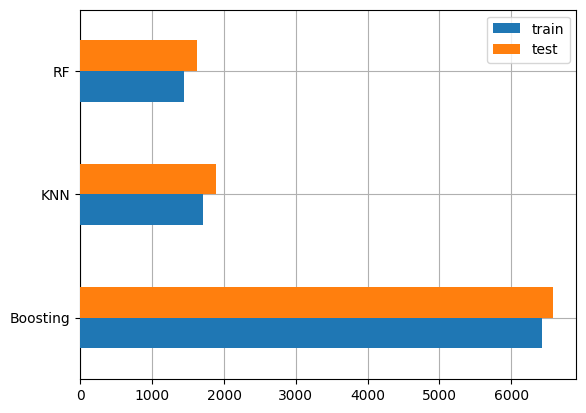

In [ ]:
fig, ax = plt.subplots()

# Plot MSE hasil pengujian model, diurutkan dari yang tertinggi ke terendah berdasarkan nilai MSE test
MSE.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)

# Menambahkan grid di belakang grafik untuk memudahkan pembacaan
ax.grid(zorder=0)

### Cek evaluasi performa model

In [ ]:
KNN_model_accuracy = KNN_model.score(x_test, y_test)*100
RF_model_accuracy = RF_model.score(x_test, y_test)*100
BA_model_accuracy = BA_model.score(x_test, y_test)*100

In [ ]:
list_evaluasi = [[KNN_model_accuracy],
            [RF_model_accuracy],
            [BA_model_accuracy]]
eval_model = pd.DataFrame(list_evaluasi,
                        columns=['Accuracy (%)'],
                        index=['K-Nearest Neighbor', 'Random Forest', 'Boosting Algorithm'])
eval_model

,Accuracy (%)
K-Nearest Neighbor,88.094477
Random Forest,89.726774
Boosting Algorithm,58.499075


Berdasarkan hasil output dapat diketahu bahwa :

### **1. Random Forest**

* **Akurasi tertinggi**: 89.73%
* Menunjukkan bahwa model ini paling **akurat dalam memprediksi label data uji**.
* Konsisten dengan hasil MSE sebelumnya, sehingga bisa dikatakan memiliki performa terbaik.

---

### **2. K-Nearest Neighbor (KNN)**

* Akurasi cukup tinggi: **88.09%**
* Hanya sedikit di bawah RF, sehingga bisa dikatakan performa **masih bagus** dan bisa jadi pilihan alternatif.

---

### **3. Boosting Algorithm**

* Akurasi rendah: **58.50%**
* Ini menunjukkan performa yang **buruk dalam klasifikasi**.

---

## **Kesimpulan**

* **Random Forest** adalah model paling baik untuk kasus ini karena memiliki akurasi yang tinggi & MSE rendah.
* **KNN** juga cukup baik dan bisa dipertimbangkan.
* **Boosting Algorithm** memerlukan evaluasi ulang karena menujukkan hasil paling kurang diantara model yang lain.


### Prediksi Model

In [ ]:
prediksi = x_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

print(" hasil prediksi :")
print(pd.DataFrame(pred_dict))

 hasil prediksi :
      y_true  prediksi_KNN  prediksi_RF  prediksi_Boosting
3524    9998        9873.8       9903.7            11707.4


Pada prediksi satu data uji yang ditampilkan, nilai aktual (y\_true) adalah 9998, sementara hasil prediksi dari ketiga model cukup mendekati namun tetap menunjukkan adanya perbedaan. Model KNN memprediksi 9873.8, Random Forest 9903.7, dan Boosting menghasilkan prediksi sebesar 11707.4. Dari ketiganya, Random Forest memberikan hasil paling mendekati nilai aktual, diikuti oleh KNN, sedangkan Boosting memberikan prediksi yang paling meleset. Hal ini menunjukkan bahwa meskipun Boosting umumnya digunakan untuk meningkatkan akurasi, dalam kasus ini performanya justru buruk, sejalan dengan hasil evaluasi sebelumnya yang menunjukkan akurasi terendah. Sementara KNN dan Random Forest tetap menunjukkan performa prediktif yang baik dan stabil, dengan kesalahan relatif kecil terhadap nilai sebenarnya.
